In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## The amount of Carbon Dioxide in the atmopshere has increased by almost 50% over the past 80 years. 
This can be seen by looking at the the amount of $CO_2$ in the atmosphere by weight, for example in tons.

Text(0, 0.5, '$CO_2$ (Billion Tons Carbon)')

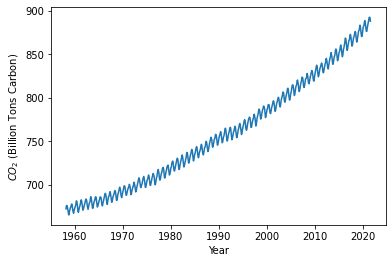

In [4]:
filename='../Data/co2_mm_mlo.txt'
month=np.loadtxt(filename).T[2]
co2=np.loadtxt(filename).T[3]
gtc=2.13 # global tons of carbon for 1 ppm
plt.plot(month,co2*gtc)
plt.xlabel('Year')
plt.ylabel('$CO_2$ (Billion Tons Carbon)')

Alternatively, we can plot the fraction of all molecules in the atmosphere that are $CO_2$. This is often expressed as ppm, or parts per million.

Text(0, 0.5, '$CO_2$ (parts per million)')

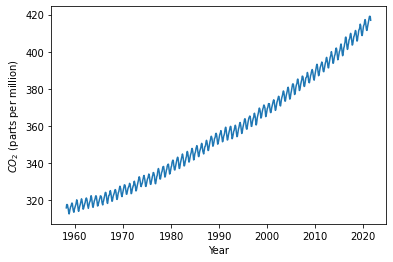

In [6]:
plt.plot(month,co2)
plt.xlabel('Year')
plt.ylabel('$CO_2$ (parts per million)')

## The ups and downs in the curve above
They arise because there is a lot more greenery in the northern hemisphere. So over the course of the summer (June, July, August), some of the carbon dioxide in the atmosphere is absorbed by the trees and grass. When that dies out over the winter, the $CO_2$ is released back into the atmosphere.
### But, don't let those wiggles divert your attention from the main issue: $CO_2$ has increased by almost 50%.


# Why does the extra $CO_2$ matter?
Carbon dioxide absorbs the radiation that the Earth emits as it tries to cool down from getting heat from the Sun. The more $CO_2$ there is, the harder it is for the Earth to cool, and the hotter it becomes. This is fact that has been known for a long-time (it is called the Greenhouse effect). At Carnegie Mellon, students on our Physics of Energy course (and many other scientists around the world) calculated how much the temperature around the world will increase as the $CO_2$ abundance increases. The result is given in the following cell.

Text(405, 1.7, 'Today')

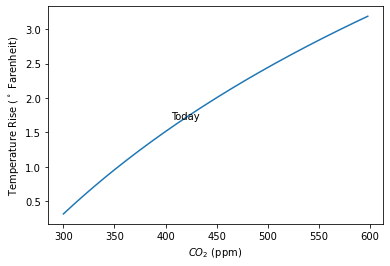

In [26]:
# The following 2 lines define a function that predicts how 
# much the temperature will increase as the $CO_2$ increases. 
def temperature_change(co2):
    return (3.7/1.6*np.log(co2/278))*1.8 #change to Farenheit
# We can plot this.
c=np.arange(300.,600,2.)
plt.plot(c,temperature_change(c))
plt.xlabel('$CO_2$ (ppm)')
plt.ylabel('Temperature Rise ($^\circ$ Farenheit)')
plt.text(405,1.7,'Today')


The plot above shows that the temperature should have increased by close to 2 degrees Farenheit since the carbon dioxide levels have risen. In fact, we have careful temperature readings going back hundreds of years. Before modern machinery (the Industrial Revolution), the $CO_2$ abundance was about 280 ppm. Now that it has risen to about 420 ppm,  the plot above indicates that the temperature should be about 2 degrees higher than it was a hundred years ago. The next box checks that.

Text(0, 0.5, 'Global Temperature compared to Pre-Industrial Average')

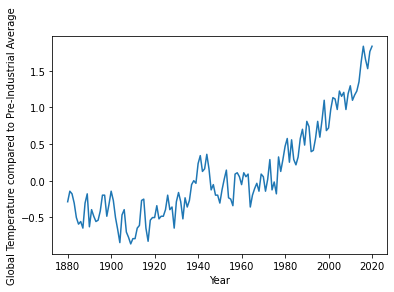

In [27]:
tempdata='../Data/temperatures.txt'
yr=np.loadtxt(tempdata).T[0]
dt=np.loadtxt(tempdata).T[1]*1.8 # convert to Farenheit
plt.plot(yr,dt)
plt.xlabel('Year')
plt.ylabel('Global Temperature compared to Pre-Industrial Average')

The prediction is correct: the temperature has risen about 2 degrees over the past hundred years or so.

# What caused the increase in $CO_2$?
So far, we have looked at two data sets: (i) the amount of $CO_2$ in the atmosphere and (ii) the global temperature. Now we are going to look at a third data set, one that contains a lot of information about how much $CO_2$ humans have emitted over the past 100 years. The data set is in the form of a spreadsheet, but instead of opening the spreadsheet with excel, we will open it as a "pandas" object. That will allow us to do lots of interesting things with the data, and there is a lot of it, so it would be hard to look at in excel.


In [ ]:
co2=pd.read_csv('../Data/owid-co2-data.csv')

In [34]:
#Let's look into this spreadsheet
# The .info method allows us to view all the columns
co2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23708 entries, 0 to 23707
Data columns (total 55 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   iso_code                             20930 non-null  object 
 1   country                              23708 non-null  object 
 2   year                                 23708 non-null  int64  
 3   co2                                  23170 non-null  float64
 4   co2_growth_prct                      21907 non-null  float64
 5   co2_growth_abs                       22014 non-null  float64
 6   consumption_co2                      3350 non-null   float64
 7   trade_co2                            3318 non-null   float64
 8   trade_co2_share                      3318 non-null   float64
 9   co2_per_capita                       22380 non-null  float64
 10  consumption_co2_per_capita           3350 non-null   float64
 11  share_global_co2            

So there are 54 columns, each of which has information about how much stuff the country in question has emitted. For our purposes, the key column the is the 'co2' column. Now let's look at the first few rows.

In [36]:
co2.head()

,iso_code,country,year,co2,co2_growth_prct,co2_growth_abs,consumption_co2,trade_co2,trade_co2_share,co2_per_capita,...,ghg_per_capita,methane,methane_per_capita,nitrous_oxide,nitrous_oxide_per_capita,primary_energy_consumption,energy_per_capita,energy_per_gdp,population,gdp
0,AFG,Afghanistan,1949,0.015,NaN,NaN,NaN,NaN,NaN,0.002,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7663783.0,NaN
1,AFG,Afghanistan,1950,0.084,475.000,0.070,NaN,NaN,NaN,0.011,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7752000.0,1.949480e+10
2,AFG,Afghanistan,1951,0.092,8.696,0.007,NaN,NaN,NaN,0.012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7840000.0,2.006385e+10
3,AFG,Afghanistan,1952,0.092,NaN,NaN,NaN,NaN,NaN,0.012,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7936000.0,2.074235e+10
4,AFG,Afghanistan,1953,0.106,16.000,0.015,NaN,NaN,NaN,0.013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8040000.0,2.201546e+10


We get the idea: each row corresponds to a given country (in this case Afghanistan) and a given year (the first few years are 1949-1953. (Note the very annoying "NaN" which stands for "Not a Number". This is annoying not only because it means we don't have the information for that year, but also because if we try to do things with the data the 'NaN's will often get in the way. A good exercise is to remove all NaN's from here, but let's continue for now.

Text(0.5, 1.0, 'Global Human Carbon Emissions')

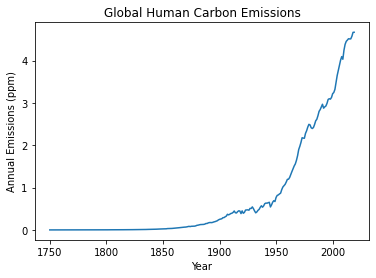

In [32]:
world=co2[co2['country']=='World']
year=world['year']
emit=world['co2']
plt.plot(year,emit/3.664/1.e3/2.13) # divide by 1.e3 because it is millions not billons
# the 3.664 is the number of nuclei in CO_2 [12+32=44] divided by that in carbon [12]
# divide by 2.13 to get to ppm
plt.xlabel('Year')
plt.ylabel('Annual Emissions (ppm)')
plt.title('Global Human Carbon Emissions')

So, every year for at least the last 60 years we have added at least one part per million. Gradually the $CO_2$ abundance has increased. Another way to show this is to plot the "cumulative" emissions (so that the number plotted in 2020 for example is all emissions up to 2020.

Text(0, 0.5, 'Cumulative Emissions (ppm)')

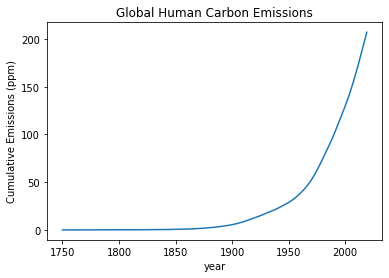

In [33]:
n=np.size(emit)
cum=np.zeros(n)
for i in range(n):
    cum[i]=np.sum(emit[:i])
plt.plot(year,cum/3.664/1.e3/2.13)
plt.xlabel('year')
plt.title('Global Human Carbon Emissions')
plt.ylabel('Cumulative Emissions (ppm)')

So, we have the story: humans have emitted more and more $CO_2$ into the atmosphere, and that has caused the Earth to warm.

# Key Question: What will happen in the future?
Well, we now know how to approach that question. We can look at how $CO_2$ emissions have been changing over time and project into the future.